<a href="https://colab.research.google.com/github/Tharat65011591/CV-Project/blob/main/Rubik_Solve_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
!unzip '/content/cv.zip'
!unzip '/content/unsolved.zip'

Face Top
Color 0 : HSV [110.875       52.52960526  57.04385965]
Color 1 : HSV [58.81578947 89.31578947 71.34210526]
Color 2 : HSV [  7.22222222 104.27430556  71.21180556]
Face Bottom
Color 0 : HSV [109.87683616  51.93333333  68.30508475]
Color 1 : HSV [ 56.47826087 137.69565217 109.34782609]
Color 2 : HSV [ 6.7940552  72.75796178 61.87473461]
Face Left
Color 0 : HSV [107.97297297  63.84942085  56.36293436]
Color 1 : HSV [58.96641791 81.29104478 56.76865672]
Color 2 : HSV [  8.86290323 122.2016129   78.62096774]
Face Right
Color 0 : HSV [109.32618683  53.28024502  73.6676876 ]
Color 1 : HSV [50.83646113 95.91689008 56.5844504 ]
Color 2 : HSV [ 5.43756146 60.2546706  60.63815143]
Face Front
Color 0 : HSV [110.41646778  52.94391408  66.90930788]
Color 1 : HSV [ 48.58088235 113.86764706  57.27205882]
Color 2 : HSV [ 7.90406674 60.13764338 58.80709072]
Face Back
Color 0 : HSV [106.91436865  52.35558781  90.16835994]
Color 1 : HSV [52.66836735 97.37755102 59.25      ]
Color 2 : HSV [ 7.57424

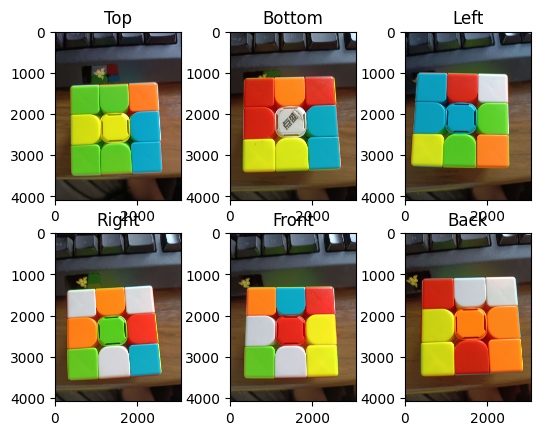

In [ ]:
# Function to detect colors from the image
def detect_colors(image):
    # Convert image to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define lower and upper bounds for each color
    lower_blue = np.array([90, 50, 50])
    upper_blue = np.array([130, 255, 255])
    lower_green = np.array([40, 50, 50])
    upper_green = np.array([80, 255, 255])
    lower_red1 = np.array([0, 50, 50])
    upper_red1 = np.array([10, 255, 255])
    lower_red2 = np.array([170, 50, 50])
    upper_red2 = np.array([180, 255, 255])

    # Mask each color
    mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)
    mask_green = cv2.inRange(hsv, lower_green, upper_green)
    mask_red1 = cv2.inRange(hsv, lower_red1, upper_red1)
    mask_red2 = cv2.inRange(hsv, lower_red2, upper_red2)
    mask_red = cv2.bitwise_or(mask_red1, mask_red2)

    # Find contours
    contours_blue, _ = cv2.findContours(mask_blue, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours_green, _ = cv2.findContours(mask_green, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours_red, _ = cv2.findContours(mask_red, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Get the average color of each contour
    colors = []
    for contours in [contours_blue, contours_green, contours_red]:
        color = []
        for contour in contours:
            M = cv2.moments(contour)
            if M["m00"] != 0:
                cX = int(M["m10"] / M["m00"])
                cY = int(M["m01"] / M["m00"])
                color.append(hsv[cY, cX])
        if color:
            colors.append(np.mean(color, axis=0))
        else:
            colors.append(None)

    return colors

# Example images of each face of the Rubik's Cube
top = cv2.imread("/content/cv/top.jpg")
bottom = cv2.imread("/content/cv/bot.jpg")
left = cv2.imread("/content/cv/left.jpg")
right = cv2.imread("/content/cv/right.jpg")
front = cv2.imread("/content/cv/front.jpg")
back = cv2.imread("/content/cv/back.jpg")



# Detect colors for each face
colors = []
for face in [top, bottom, left, right, front, back]:
    colors.append(detect_colors(face))

# Print detected colors
for i, face_colors in enumerate(colors):
    print("Face", ["Top", "Bottom", "Left", "Right", "Front", "Back"][i])
    for j, color in enumerate(face_colors):
        if color is not None:
            print("Color", j, ": HSV", color)

# Visualization of the Rubik's Cube
fig, axs = plt.subplots(2, 3)
for i, ax in enumerate(axs.flat):
    ax.imshow(cv2.cvtColor([top, bottom, left, right, front, back][i], cv2.COLOR_BGR2RGB))  # Display each face
    ax.set_title(["Top", "Bottom", "Left", "Right", "Front", "Back"][i])
plt.show()

In [ ]:
def round_up_to_10(number):
    remainder = number % 10
    if remainder >= 5:
        return number + (10 - remainder)
    else:
        return number - remainder

In [ ]:
def compare_cube_states(cube_colors, solved_colors, threshold=0.1):
    total_stickers = 0
    matching_stickers = 0


    cube_colors = np.array(cube_colors)
    solved_colors = np.array(solved_colors)

    cube_colors_rounded = np.vectorize(round_up_to_10)(cube_colors)

    solved_colors_rounded = np.vectorize(round_up_to_10)(solved_colors)


    color_difference = np.abs(cube_colors_rounded - solved_colors_rounded)

    matching_stickers_mask = np.all(color_difference <= 10, axis=2)

    matching_stickers = np.sum(matching_stickers_mask)

    total_stickers = cube_colors.size // 3

    percentage_matching = matching_stickers / total_stickers

    if percentage_matching >= threshold:
        return True, None
    else:
        moves = step1_moves(cube_colors, solved_colors)
        return False, moves




In [ ]:
step1_front = cv2.imread('/content/cv/step1_front.jpg')
step1_back = cv2.imread('/content/cv/step1_back.jpg')
step1_top = cv2.imread('/content/cv/step1_top.jpg')
step1_bot = cv2.imread('/content/cv/step1_bot.jpg')
step1_right = cv2.imread('/content/cv/step1_right.jpg')
step1_left = cv2.imread('/content/cv/step1_left.jpg')


# Detect colors for each face
step1 = []
for face in [step1_front, step1_back, step1_top, step1_bot, step1_right, step1_left]:
    step1.append(detect_colors(face))

# Print detected colors
for i, face_colors in enumerate(step1):
    print("Face", ["Top", "Bottom", "Left", "Right", "Front", "Back"][i])
    for j, color in enumerate(face_colors):
        if color is not None:
            print("Color", j, ": HSV", color)

Face Top
Color 0 : HSV [116.00384615  75.55384615  53.24615385]
Color 1 : HSV [ 47.6 115.8 137.8]
Color 2 : HSV [ 7.45496894 69.1552795  60.69875776]
Face Bottom
Color 0 : HSV [117.85185185  60.74074074 125.74074074]
Color 1 : HSV [ 46.27272727 195.         153.09090909]
Color 2 : HSV [ 9.75065274 80.00522193 65.24281984]
Face Left
Color 0 : HSV [113.3 107.6 119.5]
Color 1 : HSV [ 49.6875  146.96875 154.6875 ]
Color 2 : HSV [ 8.79259777 93.09217877 54.56703911]
Face Right
Color 0 : HSV [ 94. 203. 250.]
Color 1 : HSV [ 45.          81.66666667 139.33333333]
Color 2 : HSV [  8.61490683 101.64182195  84.24016563]
Face Front
Color 0 : HSV [ 94.5  109.75 205.75]
Color 1 : HSV [ 46.14814815 137.37037037  74.92592593]
Color 2 : HSV [ 9.97720798 80.41737892 53.84615385]
Face Back
Color 0 : HSV [114.42857143 145.85714286  89.42857143]
Color 1 : HSV [ 53.66666667 147.         119.        ]
Color 2 : HSV [ 8.89295393 73.10840108 67.41734417]


In [ ]:
def step1_moves(cube_colors, solved_colors):

    moves = []

    for face, (cube_face_colors, solved_face_colors) in enumerate(zip(cube_colors, solved_colors)):
        if cube_face_colors is None or len(cube_face_colors) != 3:
            return None  # If color detection fails for any face, return None
        for color_idx, (cube_color, solved_color) in enumerate(zip(cube_face_colors, solved_face_colors)):
            if cube_color is None:
                return None  # If color detection fails for any sticker, return None
            if not np.allclose(cube_color, solved_color, atol=10):  # Tolerance of 10 in HSV space
                # Determine the move needed to solve the sticker
                move = None
                if face == 0:
                    move = "White On Left Corner: D L' D' L  "
                elif face == 1:
                    move = "White On Middle: M' B B M or D M' D' M"
                elif face == 2:
                    if color_idx == 0:
                        move = "White On Right Corner: D R' D'  R"
                if move:
                    moves.append(move)

    return moves

In [ ]:
compare_cube_states(colors, step1)

(True, None)

Face Top
Color 0 : HSV [109.5969163   51.15859031  67.32278734]
Color 1 : HSV [ 45.7  117.75  97.1 ]
Color 2 : HSV [  7.49862259 131.95316804  73.60330579]
Face Bottom
Color 0 : HSV [109.70859167  55.80690877  68.65013286]
Color 1 : HSV [ 57.66666667  85.22222222 102.88888889]
Color 2 : HSV [  6.98107256 135.09148265  56.15457413]
Face Left
Color 0 : HSV [104.69784173  58.8441247   68.62110312]
Color 1 : HSV [63.29113924 92.30379747 80.11392405]
Color 2 : HSV [ 14.55045872 118.95412844  87.03669725]
Face Right
Color 0 : HSV [104.24434982  52.20602686  72.40189977]
Color 1 : HSV [59.9009009  75.25225225 61.71171171]
Color 2 : HSV [  8.16129032 161.87096774  86.08064516]
Face Front
Color 0 : HSV [108.75907591  56.53465347  78.35313531]
Color 1 : HSV [ 49.75 127.75 188.  ]
Color 2 : HSV [14.55555556 97.18518519 90.61728395]
Face Back
Color 0 : HSV [107.91915761  51.47622283  73.828125  ]
Color 1 : HSV [ 55.57894737 105.52631579  81.26315789]
Color 2 : HSV [ 18.71794872 119.91666667 103.10

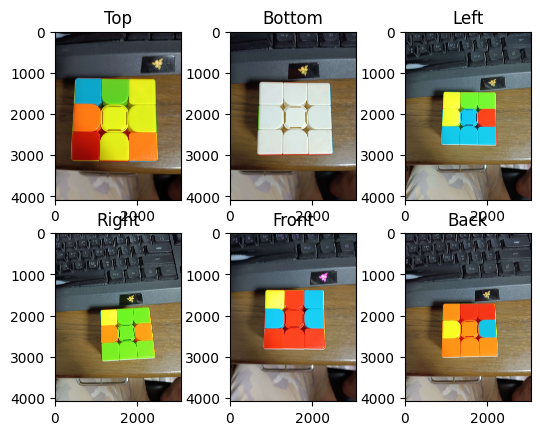

In [ ]:
  #Update Rubik

  top = cv2.imread("/content/unsolved/1_2.jpg")
  bottom = cv2.imread("/content/unsolved/1_1.jpg")
  left = cv2.imread("/content/unsolved/1_5.jpg")
  right = cv2.imread("/content/unsolved/1_6.jpg")
  front = cv2.imread("/content/unsolved/1_3.jpg")
  back = cv2.imread("/content/unsolved/1_4.jpg")


  colors = []
  for face in [top, bottom, left, right, front, back]:
      colors.append(detect_colors(face))

  # Print detected colors
  for i, face_colors in enumerate(colors):
      print("Face", ["Top", "Bottom", "Left", "Right", "Front", "Back"][i])
      for j, color in enumerate(face_colors):
          if color is not None:
              print("Color", j, ": HSV", color)
fig, axs = plt.subplots(2, 3)
for i, ax in enumerate(axs.flat):
    ax.imshow(cv2.cvtColor([top, bottom, left, right, front, back][i], cv2.COLOR_BGR2RGB))  # Display each face
    ax.set_title(["Top", "Bottom", "Left", "Right", "Front", "Back"][i])
plt.show()

In [ ]:
def compare_cube_states(cube_colors, solved_colors, threshold=0.01):
    total_stickers = 0
    matching_stickers = 0

    cube_colors = np.array(cube_colors)
    solved_colors = np.array(solved_colors)

    cube_colors_rounded = np.vectorize(round_up_to_10)(cube_colors)

    solved_colors_rounded = np.vectorize(round_up_to_10)(solved_colors)

    color_difference = np.abs(cube_colors_rounded - solved_colors_rounded)

    matching_stickers_mask = np.all(color_difference <= 10, axis=2)
    matching_stickers = np.sum(matching_stickers_mask)

    total_stickers = cube_colors.size // 3

    percentage_matching = matching_stickers / total_stickers

    if percentage_matching >= threshold:
        return True, None
    else:
        moves = step2_moves(cube_colors, solved_colors)
        return False, moves

In [ ]:
def step2_moves(cube_colors, solved_colors):

    moves = []

    for face, (cube_face_colors, solved_face_colors) in enumerate(zip(cube_colors, solved_colors)):
        if cube_face_colors is None or len(cube_face_colors) != 3:
            return None  # If color detection fails for any face, return None
        for color_idx, (cube_color, solved_color) in enumerate(zip(cube_face_colors, solved_face_colors)):
            if cube_color is None:
                return None  # If color detection fails for any sticker, return None
            if not np.allclose(cube_color, solved_color, atol=10):  # Tolerance of 10 in HSV space
                # Determine the move needed to solve the sticker
                move = None
                if face == 0:
                    move = "Move front color to correct the face Color. Color Top on left: U L U' L' U' F U F' "
                elif face == 1:
                    move = ""
                elif face == 2:
                    if color_idx == 0:
                        move = "Move front color to correct the face Color. Color Top on right: U' R U R' U F' U' F"
                if move:
                    moves.append(move)

    return moves

In [ ]:
step2_front = cv2.imread('/content/cv/step2_front.jpg')
step2_back = cv2.imread('/content/cv/step2_back.jpg')
step2_top = cv2.imread('/content/cv/step2_top.jpg')
step2_bot = cv2.imread('/content/cv/step2_bot.jpg')
step2_right = cv2.imread('/content/cv/step2_right.jpg')
step2_left = cv2.imread('/content/cv/step2_left.jpg')


# Detect colors for each face
step2 = []
for face in [step2_front, step2_back, step2_top, step2_bot, step2_right, step2_left]:
    step2.append(detect_colors(face))

# Print detected colors
for i, face_colors in enumerate(step2):
    print("Face", ["Top", "Bottom", "Left", "Right", "Front", "Back"][i])
    for j, color in enumerate(face_colors):
        if color is not None:
            print("Color", j, ": HSV", color)

Face Top
Color 0 : HSV [107.38461538 110.84615385 100.        ]
Color 1 : HSV [ 51.   162.25 193.75]
Color 2 : HSV [ 7.91932059 65.71549894 57.72823779]
Face Bottom
Color 0 : HSV [111.38095238 123.64285714  55.95238095]
Color 1 : HSV [ 64.20689655 118.93103448  73.89655172]
Color 2 : HSV [10.17488076 99.60572337 78.81875994]
Face Left
Color 0 : HSV [112.30612245 102.59183673  65.7755102 ]
Color 1 : HSV [ 53.44117647 142.17647059 120.91176471]
Color 2 : HSV [ 8.28829686 86.63082778 55.41579448]
Face Right
Color 0 : HSV [94.82352941 77.76470588 95.76470588]
Color 1 : HSV [71.36507937 59.66666667 76.85714286]
Color 2 : HSV [  9.27467811 144.5565093   65.35908441]
Face Front
Color 0 : HSV [101.22727273  89.22727273 127.40909091]
Color 1 : HSV [ 66.33333333  90.5        215.16666667]
Color 2 : HSV [10.91968728 68.00781805 55.50177683]
Face Back
Color 0 : HSV [106.88513514 153.18918919  57.27027027]
Color 1 : HSV [ 53.1 129.1 105.2]
Color 2 : HSV [ 8.44609665 69.45576208 64.58513011]


In [ ]:
compare_cube_states(colors,step2)

(False,
 ["Move front color to correct the face Color. Color Top on left: U L U' L' U' F U F' ",
  "Move front color to correct the face Color. Color Top on left: U L U' L' U' F U F' ",
  "Move front color to correct the face Color. Color Top on left: U L U' L' U' F U F' ",
  "Move front color to correct the face Color. Color Top on right: U' R U R' U F' U' F"])

Face Top
Color 0 : HSV [109.75120048  51.27761104  67.1137455 ]
Color 1 : HSV [ 53.18421053 121.44736842 118.92105263]
Color 2 : HSV [  9.26041667 122.03645833  71.52083333]
Face Bottom
Color 0 : HSV [109.70859167  55.80690877  68.65013286]
Color 1 : HSV [ 57.66666667  85.22222222 102.88888889]
Color 2 : HSV [  6.98107256 135.09148265  56.15457413]
Face Left
Color 0 : HSV [107.15668203  61.13133641  58.11520737]
Color 1 : HSV [58.39215686 88.17647059 66.07843137]
Color 2 : HSV [  8.25454545 118.69090909  74.32727273]
Face Right
Color 0 : HSV [107.41340148  54.57637706  57.10391823]
Color 1 : HSV [56.23076923 97.25       60.96153846]
Color 2 : HSV [ 10.13043478 136.59782609  66.22826087]
Face Front
Color 0 : HSV [112.63987364  51.13232713  60.9003159 ]
Color 1 : HSV [ 45.65 129.4  146.9 ]
Color 2 : HSV [  9.09641256 132.57623318  57.92825112]
Face Back
Color 0 : HSV [104.17850181  51.81787803  78.25146199]
Color 1 : HSV [ 52.         108.77083333  86.25      ]
Color 2 : HSV [ 12.7701863

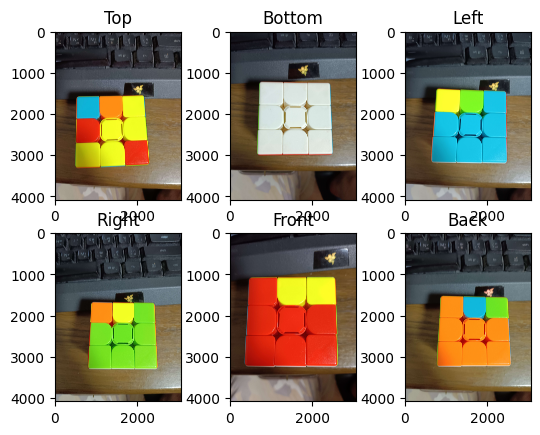

In [ ]:
  #Update Rubik

  top = cv2.imread("/content/unsolved/2_2.jpg")
  bottom = cv2.imread("/content/unsolved/1_1.jpg")
  left = cv2.imread("/content/unsolved/2_5.jpg")
  right = cv2.imread("/content/unsolved/2_6.jpg")
  front = cv2.imread("/content/unsolved/2_3.jpg")
  back = cv2.imread("/content/unsolved/2_4.jpg")


  colors = []
  for face in [top, bottom, left, right, front, back]:
      colors.append(detect_colors(face))

  # Print detected colors
  for i, face_colors in enumerate(colors):
      print("Face", ["Top", "Bottom", "Left", "Right", "Front", "Back"][i])
      for j, color in enumerate(face_colors):
          if color is not None:
              print("Color", j, ": HSV", color)
fig, axs = plt.subplots(2, 3)
for i, ax in enumerate(axs.flat):
    ax.imshow(cv2.cvtColor([top, bottom, left, right, front, back][i], cv2.COLOR_BGR2RGB))  # Display each face
    ax.set_title(["Top", "Bottom", "Left", "Right", "Front", "Back"][i])
plt.show()

In [ ]:
compare_cube_states(colors,step2)

(True, None)

In [ ]:

step3_top = cv2.imread('/content/cv/step3_top1.jpg')



# Detect colors for each face
step3 = []
for face in [step3_top]:
    step3.append(detect_colors(face))

# Print detected colors
for i, face_colors in enumerate(step3):
    print("Face", ["Top"][i])
    for j, color in enumerate(face_colors):
        if color is not None:
            print("Color", j, ": HSV", color)

Face Top
Color 0 : HSV [109.75120048  51.27761104  67.1137455 ]
Color 1 : HSV [ 53.18421053 121.44736842 118.92105263]
Color 2 : HSV [  9.26041667 122.03645833  71.52083333]


In [ ]:
def compare_cube_states(cube_colors, solved_colors, threshold=0.01):
    total_stickers = 0
    matching_stickers = 0

    cube_colors = np.array(cube_colors)
    solved_colors = np.array(solved_colors)

    cube_colors_rounded = np.vectorize(round_up_to_10)(cube_colors)

    solved_colors_rounded = np.vectorize(round_up_to_10)(solved_colors)

    color_difference = np.abs(cube_colors_rounded - solved_colors_rounded)

    matching_stickers_mask = np.all(color_difference <= 10, axis=2)
    matching_stickers = np.sum(matching_stickers_mask)

    total_stickers = cube_colors.size // 3

    percentage_matching = matching_stickers / total_stickers

    if percentage_matching >= threshold:
      moves = step3_moves(cube_colors, solved_colors)
      return True, moves
    else:
      return False, None

In [ ]:
def step3_moves(cube_colors, solved_colors):

    moves = []

    for face, (cube_face_colors, solved_face_colors) in enumerate(zip(cube_colors, solved_colors)):
        if cube_face_colors is None or len(cube_face_colors) != 3:
            return None  # If color detection fails for any face, return None
        for color_idx, (cube_color, solved_color) in enumerate(zip(cube_face_colors, solved_face_colors)):
            if cube_color is None:
                return None  # If color detection fails for any sticker, return None
            if not np.allclose(cube_color, solved_color, atol=10):  # Tolerance of 10 in HSV space
                # Determine the move needed to solve the sticker
                move = None
                if face == 0:
                    move = " U' U' F U' R U R' F' , R U' R' U' R U' U' R' (Repeat Until Full Yellow) "
                elif face == 0:
                    move = ""
                elif face == 2:
                    if color_idx == 0:
                        move = " "
                if move:
                    moves.append(move)

    return moves

In [ ]:
compare_cube_states(colors[0],step3)

(True,
 [" U' U' F U' R U R' F' , R U' R' U' R U' U' R' (Repeat Until Full Yellow) ",
  " U' U' F U' R U R' F' , R U' R' U' R U' U' R' (Repeat Until Full Yellow) ",
  " U' U' F U' R U R' F' , R U' R' U' R U' U' R' (Repeat Until Full Yellow) "])

Face Top
Color 0 : HSV [115.04444444  74.95555556  56.44444444]
Color 1 : HSV [ 51.33333333 151.         134.5       ]
Color 2 : HSV [12.01165254 94.54449153 60.75423729]
Face Bottom
Color 0 : HSV [109.70859167  55.80690877  68.65013286]
Color 1 : HSV [ 57.66666667  85.22222222 102.88888889]
Color 2 : HSV [  6.98107256 135.09148265  56.15457413]
Face Left
Color 0 : HSV [106.87619048  68.2952381   66.87619048]
Color 1 : HSV [ 52.26315789 104.10526316 104.63157895]
Color 2 : HSV [ 15.59689922 108.23255814  69.01550388]
Face Right
Color 0 : HSV [104.04526749  92.0781893   57.7654321 ]
Color 1 : HSV [50.02439024 97.6097561  69.85365854]
Color 2 : HSV [  8.1253406  116.9373297   60.89373297]
Face Front
Color 0 : HSV [109.97520661  61.17355372  72.90082645]
Color 1 : HSV [ 46.         112.         129.81818182]
Color 2 : HSV [10.2173913  95.04347826 72.63478261]
Face Back
Color 0 : HSV [104.88469129  51.27177897  73.99689879]
Color 1 : HSV [62.7826087  92.04347826 90.60869565]
Color 2 : HSV 

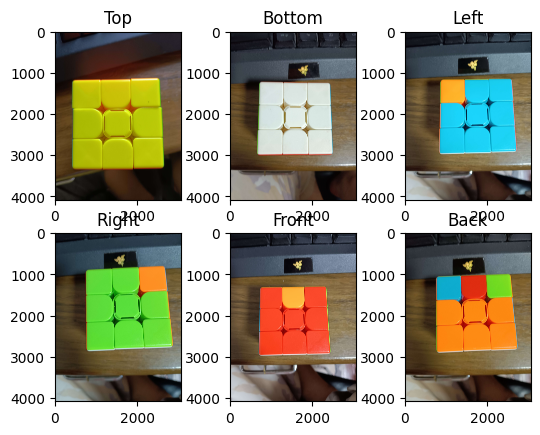

In [ ]:
  #Update Rubik

  top = cv2.imread("/content/unsolved/3_5.jpg")
  bottom = cv2.imread("/content/unsolved/1_1.jpg")
  left = cv2.imread("/content/unsolved/3_4.jpg")
  right = cv2.imread("/content/unsolved/3_3.jpg")
  front = cv2.imread("/content/unsolved/3_1.jpg")
  back = cv2.imread("/content/unsolved/3_2.jpg")


  colors = []
  for face in [top, bottom, left, right, front, back]:
      colors.append(detect_colors(face))

  # Print detected colors
  for i, face_colors in enumerate(colors):
      print("Face", ["Top", "Bottom", "Left", "Right", "Front", "Back"][i])
      for j, color in enumerate(face_colors):
          if color is not None:
              print("Color", j, ": HSV", color)
fig, axs = plt.subplots(2, 3)
for i, ax in enumerate(axs.flat):
    ax.imshow(cv2.cvtColor([top, bottom, left, right, front, back][i], cv2.COLOR_BGR2RGB))  # Display each face
    ax.set_title(["Top", "Bottom", "Left", "Right", "Front", "Back"][i])
plt.show()

In [ ]:
step4_top = cv2.imread("/content/unsolved/3_5.jpg")
step4_bot = cv2.imread("/content/unsolved/1_1.jpg")
step4_front = cv2.imread("/content/cv/step5_pattern3.jpg")
step4_back = cv2.imread("/content/unsolved/2_2.jpg")
step4_left = cv2.imread("/content/cv/step5_pattern2.jpg")
step4_right = cv2.imread("/content/cv/step5_pattern1.jpg")

step4 = []
for face in [step4_top, step4_bot, step4_left, step4_right, step4_front, step4_back]:
  step4.append(detect_colors(face))

  # Print detected colors
for i, face_colors in enumerate(step4):
  print("Face", ["Top", "Bottom", "Left", "Right", "Front", "Back"][i])
  for j, color in enumerate(face_colors):
    if color is not None:
      print("Color", j, ": HSV", color)

Face Top
Color 0 : HSV [115.04444444  74.95555556  56.44444444]
Color 1 : HSV [ 51.33333333 151.         134.5       ]
Color 2 : HSV [12.01165254 94.54449153 60.75423729]
Face Bottom
Color 0 : HSV [109.70859167  55.80690877  68.65013286]
Color 1 : HSV [ 57.66666667  85.22222222 102.88888889]
Color 2 : HSV [  6.98107256 135.09148265  56.15457413]
Face Left
Color 0 : HSV [106.25       171.19444444  57.27777778]
Color 1 : HSV [ 71.375 220.125  70.375]
Color 2 : HSV [ 8.13891213 71.68451883 59.57740586]
Face Right
Color 0 : HSV [103.7        138.83333333  84.5       ]
Color 1 : HSV [ 52.14285714  78.14285714 221.28571429]
Color 2 : HSV [ 7.98170732 65.70325203 87.71138211]
Face Front
Color 0 : HSV [109.97520661  61.17355372  72.90082645]
Color 1 : HSV [ 46.         112.         129.81818182]
Color 2 : HSV [10.2173913  95.04347826 72.63478261]
Face Back
Color 0 : HSV [109.75120048  51.27761104  67.1137455 ]
Color 1 : HSV [ 53.18421053 121.44736842 118.92105263]
Color 2 : HSV [  9.26041667 1

In [ ]:
def compare_cube_states(cube_colors, solved_colors, threshold=0.01):
    total_stickers = 0
    matching_stickers = 0

    cube_colors = np.array(cube_colors)
    solved_colors = np.array(solved_colors)

    cube_colors_rounded = np.vectorize(round_up_to_10)(cube_colors)

    solved_colors_rounded = np.vectorize(round_up_to_10)(solved_colors)

    color_difference = np.abs(cube_colors_rounded - solved_colors_rounded)

    matching_stickers_mask = np.all(color_difference <= 10, axis=2)
    matching_stickers = np.sum(matching_stickers_mask)

    total_stickers = cube_colors.size // 3

    percentage_matching = matching_stickers / total_stickers

    if percentage_matching >= threshold:
      moves = step4_moves(cube_colors, solved_colors)
      return True, moves
    else:
      return False, None

In [ ]:
def step4_moves(cube_colors, solved_colors):

    moves = []

    for face, (cube_face_colors, solved_face_colors) in enumerate(zip(cube_colors, solved_colors)):
        if cube_face_colors is None or len(cube_face_colors) != 3:
            return None  # If color detection fails for any face, return None
        for color_idx, (cube_color, solved_color) in enumerate(zip(cube_face_colors, solved_face_colors)):
            if cube_color is None:
                return None  # If color detection fails for any sticker, return None
            if not np.allclose(cube_color, solved_color, atol=10):  # Tolerance of 10 in HSV space
                # Determine the move needed to solve the sticker
                move = None
                if face == 0:
                    move = ""
                elif face == 1:
                    move = ""
                elif face == 2:
                    if color_idx == 0:
                        move = "R' U R' 2B' R F' R' 2B' 2R U"
                if move:
                    moves.append(move)

    return moves

In [ ]:
compare_cube_states(colors, step4)

(True,
 [" U' U' F U' R U R' F' , R U' R' U' R U' U' R' (Repeat Until Full Yellow) "])

Face Top
Color 0 : HSV [115.04444444  74.95555556  56.44444444]
Color 1 : HSV [ 51.33333333 151.         134.5       ]
Color 2 : HSV [12.01165254 94.54449153 60.75423729]
Face Bottom
Color 0 : HSV [109.70859167  55.80690877  68.65013286]
Color 1 : HSV [ 57.66666667  85.22222222 102.88888889]
Color 2 : HSV [  6.98107256 135.09148265  56.15457413]
Face Left
Color 0 : HSV [101.45454545  76.         102.72727273]
Color 1 : HSV [ 70.14285714  55.14285714 101.57142857]
Color 2 : HSV [ 8.89361702 59.58358663 81.08206687]
Face Right
Color 0 : HSV [106.10526316  53.48684211  95.13157895]
Color 1 : HSV [ 56.25   145.125  136.9375]
Color 2 : HSV [ 9.25971831 62.53633803 62.06197183]
Face Front
Color 0 : HSV [115.16129032  58.51612903  80.48387097]
Color 1 : HSV [ 51.33333333  96.33333333 196.        ]
Color 2 : HSV [13.34768212 81.33443709 90.08609272]
Face Back
Color 0 : HSV [111.96286812  51.22791293  58.59795134]
Color 1 : HSV [ 43.6 154.8  99. ]
Color 2 : HSV [ 9.72334559 85.02022059 84.54503

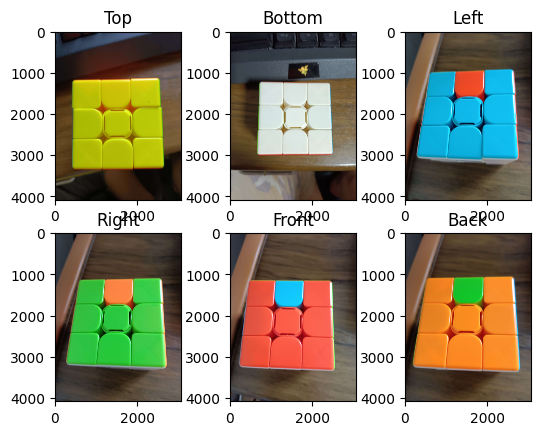

In [ ]:
#Update Rubik

top = cv2.imread("/content/unsolved/3_5.jpg")
bottom = cv2.imread("/content/unsolved/1_1.jpg")
left = cv2.imread("/content/unsolved/4_3.jpg")
right = cv2.imread("/content/unsolved/4_4.jpg")
front = cv2.imread("/content/unsolved/4_1.jpg")
back = cv2.imread("/content/unsolved/4_2.jpg")


colors = []
for face in [top, bottom, left, right, front, back]:
      colors.append(detect_colors(face))

# Print detected colors
for i, face_colors in enumerate(colors):
  print("Face", ["Top", "Bottom", "Left", "Right", "Front", "Back"][i])
  for j, color in enumerate(face_colors):
    if color is not None:
      print("Color", j, ": HSV", color)
fig, axs = plt.subplots(2, 3)
for i, ax in enumerate(axs.flat):
    ax.imshow(cv2.cvtColor([top, bottom, left, right, front, back][i], cv2.COLOR_BGR2RGB))  # Display each face
    ax.set_title(["Top", "Bottom", "Left", "Right", "Front", "Back"][i])
plt.show()

In [ ]:
def final1_compare(cube_colors, solved_colors, threshold=0.4):
    total_stickers = 0
    matching_stickers = 0

    cube_colors = np.array(cube_colors)
    solved_colors = np.array(solved_colors)

    cube_colors_rounded = np.vectorize(round_up_to_10)(cube_colors)

    solved_colors_rounded = np.vectorize(round_up_to_10)(solved_colors)

    color_difference = np.abs(cube_colors_rounded - solved_colors_rounded)

    matching_stickers_mask = np.all(color_difference <= 10, axis=2)
    matching_stickers = np.sum(matching_stickers_mask)

    total_stickers = cube_colors.size // 3

    percentage_matching = matching_stickers / total_stickers

    if percentage_matching >= threshold:
      moves = final_pattern1(cube_colors, solved_colors)
      return True, moves
    else:
      return False, None

In [ ]:
def final2_compare(cube_colors, solved_colors, threshold=0.3):
    total_stickers = 0
    matching_stickers = 0

    cube_colors = np.array(cube_colors)
    solved_colors = np.array(solved_colors)

    cube_colors_rounded = np.vectorize(round_up_to_10)(cube_colors)

    solved_colors_rounded = np.vectorize(round_up_to_10)(solved_colors)

    color_difference = np.abs(cube_colors_rounded - solved_colors_rounded)

    matching_stickers_mask = np.all(color_difference <= 10, axis=2)
    matching_stickers = np.sum(matching_stickers_mask)

    total_stickers = cube_colors.size // 3

    percentage_matching = matching_stickers / total_stickers

    if percentage_matching >= threshold:
      moves = final_pattern2(cube_colors, solved_colors)
      return True, moves
    else:
      return False, None

In [ ]:
def final3_compare(cube_colors, solved_colors, threshold=0.2):
    total_stickers = 0
    matching_stickers = 0

    cube_colors = np.array(cube_colors)
    solved_colors = np.array(solved_colors)

    cube_colors_rounded = np.vectorize(round_up_to_10)(cube_colors)

    solved_colors_rounded = np.vectorize(round_up_to_10)(solved_colors)

    color_difference = np.abs(cube_colors_rounded - solved_colors_rounded)

    matching_stickers_mask = np.all(color_difference <= 10, axis=2)
    matching_stickers = np.sum(matching_stickers_mask)

    total_stickers = cube_colors.size // 3

    percentage_matching = matching_stickers / total_stickers

    if percentage_matching >= threshold:
      moves = final_pattern3(cube_colors, solved_colors)
      return True, moves
    else:
      return False, None

In [ ]:
def final_pattern1(cube_colors, solved_colors):

    moves = []

    for face, (cube_face_colors, solved_face_colors) in enumerate(zip(cube_colors, solved_colors)):
        if cube_face_colors is None or len(cube_face_colors) != 3:
            return None  # If color detection fails for any face, return None
        for color_idx, (cube_color, solved_color) in enumerate(zip(cube_face_colors, solved_face_colors)):
            if cube_color is None:
                return None  # If color detection fails for any sticker, return None
            if not np.allclose(cube_color, solved_color, atol=10):  # Tolerance of 10 in HSV space
                # Determine the move needed to solve the sticker
                move = None
                if face == 0:
                    move = ""
                elif face == 1:
                    move = "2M U 2M 2U 2M U 2M"
                elif face == 2:
                    if color_idx == 0:
                        move = ""
                if move:
                    moves.append(move)

    return moves

In [ ]:
def final_pattern2(cube_colors, solved_colors):

    moves = []

    for face, (cube_face_colors, solved_face_colors) in enumerate(zip(cube_colors, solved_colors)):
        if cube_face_colors is None or len(cube_face_colors) != 3:
            return None  # If color detection fails for any face, return None
        for color_idx, (cube_color, solved_color) in enumerate(zip(cube_face_colors, solved_face_colors)):
            if cube_color is None:
                return None  # If color detection fails for any sticker, return None
            if not np.allclose(cube_color, solved_color, atol=10):  # Tolerance of 10 in HSV space
                # Determine the move needed to solve the sticker
                move = None
                if face == 0:
                    move = ""
                elif face == 1:
                    move = "(Correct Color On right:R U R U' R U' R U R' U 2R')(Correct Color On left: L U' L U L U L U' L U' 2L')"
                elif face == 2:
                    if color_idx == 0:
                        move = ""
                if move:
                    moves.append(move)

    return moves

In [ ]:
def final_pattern3(cube_colors, solved_colors):

    moves = []

    for face, (cube_face_colors, solved_face_colors) in enumerate(zip(cube_colors, solved_colors)):
        if cube_face_colors is None or len(cube_face_colors) != 3:
            return None  # If color detection fails for any face, return None
        for color_idx, (cube_color, solved_color) in enumerate(zip(cube_face_colors, solved_face_colors)):
            if cube_color is None:
                return None  # If color detection fails for any sticker, return None
            if not np.allclose(cube_color, solved_color, atol=10):  # Tolerance of 10 in HSV space
                # Determine the move needed to solve the sticker
                move = None
                if face == 0:
                    move = "M U 2M U 2M U M 2U 2M U'"
                elif face == 1:
                    move = ""
                elif face == 2:
                    if color_idx == 0:
                        move = ""
                if move:
                    moves.append(move)

    return moves

In [ ]:
final_top1 = cv2.imread('/content/unsolved/3_5.jpg')
final_bot1 = cv2.imread('/content/unsolved/1_1.jpg')
final_front1 = cv2.imread('/content/cv/final1_front.jpg')
final_back1 = cv2.imread('/content/cv/final1_back.jpg')
final_left1 = cv2.imread('/content/cv/final1_left.jpg')
final_right1 = cv2.imread('/content/cv/final1_right.jpg')


# Detect colors for each face
final1 = []
for face in [final_top1,final_bot1,final_left1,final_right1,final_front1,final_back1]:
  final1.append(detect_colors(face))

# Print detected colors
for i, face_colors in enumerate(final1):
    print("Face", ["Top", "Bottom", "Left", "Right", "Front", "Back"][i])
    for j, color in enumerate(face_colors):
        if color is not None:
            print("Color", j, ": HSV", color)

Face Top
Color 0 : HSV [115.04444444  74.95555556  56.44444444]
Color 1 : HSV [ 51.33333333 151.         134.5       ]
Color 2 : HSV [12.01165254 94.54449153 60.75423729]
Face Bottom
Color 0 : HSV [109.70859167  55.80690877  68.65013286]
Color 1 : HSV [ 57.66666667  85.22222222 102.88888889]
Color 2 : HSV [  6.98107256 135.09148265  56.15457413]
Face Left
Color 0 : HSV [106.4389313   52.76717557  58.64122137]
Color 1 : HSV [ 64.14285714 149.28571429 131.        ]
Color 2 : HSV [11.23366337 71.6990099  77.42772277]
Face Right
Color 0 : HSV [107.93571429  54.8         73.61428571]
Color 1 : HSV [ 66.66666667  93.91666667 112.41666667]
Color 2 : HSV [15.72472982 67.46408137 58.19326128]
Face Front
Color 0 : HSV [115.56321839  72.59770115  80.55172414]
Color 1 : HSV [ 56.  85. 186.]
Color 2 : HSV [ 8.67225326 68.09124767 73.19180633]
Face Back
Color 0 : HSV [114.05        51.90833333  69.025     ]
Color 1 : HSV [ 41.64285714 118.71428571 100.85714286]
Color 2 : HSV [ 9.72433679 85.25259516

In [ ]:
final_top2 = cv2.imread('/content/unsolved/3_5.jpg')
final_bot2 = cv2.imread('/content/unsolved/1_1.jpg')
final_front2 = cv2.imread('/content/cv/final2_front.jpg')
final_back2 = cv2.imread('/content/cv/final2_back.jpg')
final_left2 = cv2.imread('/content/cv/final2_left.jpg')
final_right2 = cv2.imread('/content/cv/final2_right.jpg')


# Detect colors for each face
final2 = []
for face in [final_top2,final_bot2,final_left2,final_right2,final_front2,final_back2]:
  final2.append(detect_colors(face))

# Print detected colors
for i, face_colors in enumerate(final2):
    print("Face", ["Top", "Bottom", "Left", "Right", "Front", "Back"][i])
    for j, color in enumerate(face_colors):
        if color is not None:
            print("Color", j, ": HSV", color)

Face Top
Color 0 : HSV [115.04444444  74.95555556  56.44444444]
Color 1 : HSV [ 51.33333333 151.         134.5       ]
Color 2 : HSV [12.01165254 94.54449153 60.75423729]
Face Bottom
Color 0 : HSV [109.70859167  55.80690877  68.65013286]
Color 1 : HSV [ 57.66666667  85.22222222 102.88888889]
Color 2 : HSV [  6.98107256 135.09148265  56.15457413]
Face Left
Color 0 : HSV [109.14379085 152.05882353  58.36601307]
Color 1 : HSV [70.  60.4 86.6]
Color 2 : HSV [ 7.09411765 62.85882353 76.30117647]
Face Right
Color 0 : HSV [109.59050445  61.45400593  61.38575668]
Color 1 : HSV [ 59.75  90.75 182.75]
Color 2 : HSV [13.28220141 67.57025761 62.87119438]
Face Front
Color 0 : HSV [116.52112676  52.90140845  75.64788732]
Color 1 : HSV [ 47.   78.5 119. ]
Color 2 : HSV [21.16585366 94.97073171 73.35609756]
Face Back
Color 0 : HSV [111.82082324  57.42372881  54.26876513]
Color 1 : HSV [ 48.5 103.  170.5]
Color 2 : HSV [ 8.50136488 86.32757052 81.17015469]


In [ ]:
final_top3 = cv2.imread('/content/unsolved/3_5.jpg')
final_bot3 = cv2.imread('/content/unsolved/1_1.jpg')
final_front3 = cv2.imread('/content/cv/final3_front.jpg')
final_back3 = cv2.imread('/content/cv/final3_back.jpg')
final_left3 = cv2.imread('/content/cv/final3_left.jpg')
final_right3 = cv2.imread('/content/cv/final3_right.jpg')


# Detect colors for each face
final3 = []
for face in [final_top3,final_bot3,final_left3,final_right3,final_front3,final_back3]:
  final3.append(detect_colors(face))

# Print detected colors
for i, face_colors in enumerate(final3):
    print("Face", ["Top", "Bottom", "Left", "Right", "Front", "Back"][i])
    for j, color in enumerate(face_colors):
        if color is not None:
            print("Color", j, ": HSV", color)

Face Top
Color 0 : HSV [115.04444444  74.95555556  56.44444444]
Color 1 : HSV [ 51.33333333 151.         134.5       ]
Color 2 : HSV [12.01165254 94.54449153 60.75423729]
Face Bottom
Color 0 : HSV [109.70859167  55.80690877  68.65013286]
Color 1 : HSV [ 57.66666667  85.22222222 102.88888889]
Color 2 : HSV [  6.98107256 135.09148265  56.15457413]
Face Left
Color 0 : HSV [101.45454545  76.         102.72727273]
Color 1 : HSV [ 70.14285714  55.14285714 101.57142857]
Color 2 : HSV [ 8.89361702 59.58358663 81.08206687]
Face Right
Color 0 : HSV [106.10526316  53.48684211  95.13157895]
Color 1 : HSV [ 56.25   145.125  136.9375]
Color 2 : HSV [ 9.25971831 62.53633803 62.06197183]
Face Front
Color 0 : HSV [115.16129032  58.51612903  80.48387097]
Color 1 : HSV [ 51.33333333  96.33333333 196.        ]
Color 2 : HSV [13.34768212 81.33443709 90.08609272]
Face Back
Color 0 : HSV [111.96286812  51.22791293  58.59795134]
Color 1 : HSV [ 43.6 154.8  99. ]
Color 2 : HSV [ 9.72334559 85.02022059 84.54503

In [ ]:
final1_compare(colors,final1)

(False, None)

In [ ]:
final2_compare(colors,final2)

(False, None)

In [ ]:
final3_compare(colors,final3)

(True,
 ["M U 2M U 2M U M 2U 2M U'",
  "M U 2M U 2M U M 2U 2M U'",
  "M U 2M U 2M U M 2U 2M U'"])

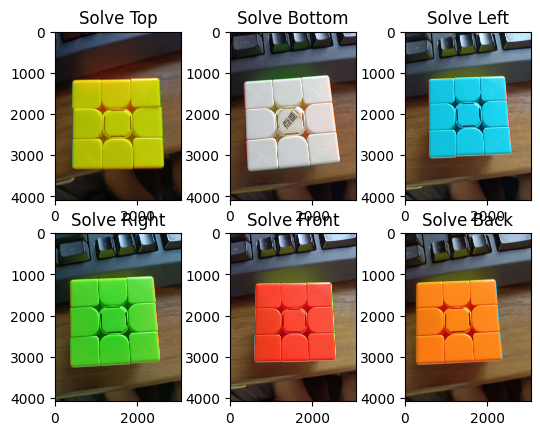

In [ ]:
#Update Rubik

top = cv2.imread("/content/unsolved/done1.jpg")
bottom = cv2.imread("/content/unsolved/done2.jpg")
left = cv2.imread("/content/unsolved/done5.jpg")
right = cv2.imread("/content/unsolved/done6.jpg")
front = cv2.imread("/content/unsolved/done3.jpg")
back = cv2.imread("/content/unsolved/done4.jpg")


colors = []
for face in [top, bottom, left, right, front, back]:
      colors.append(detect_colors(face))

# Print detected colors
fig, axs = plt.subplots(2, 3)
for i, ax in enumerate(axs.flat):
    ax.imshow(cv2.cvtColor([top, bottom, left, right, front, back][i], cv2.COLOR_BGR2RGB))  # Display each face
    ax.set_title(["Solve Top", "Solve Bottom", "Solve Left", "Solve Right", "Solve Front", "Solve Back"][i])
plt.show()